## Good sources

http://scikit-image.org
https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/
https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html

In [1]:
#############################################################
# Computer Vision Exercise 2
# Jan Ondras
# 01/12/2017
#############################################################
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from skimage import io
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix
from sklearn import svm, datasets, metrics
from sklearn.model_selection import GridSearchCV
import itertools
import numpy as np
import cv2
import glob

# Load dataset
classes = ['bridge', 'coast', 'mountain', 'rainforest'] # correspond to labels 0,1,2,3 in this order
train_images = {}
test_images = {}
for c in classes:
    train_images[c] = glob.glob('./../TrainingSet/' + c + '/*.jpg')
    test_images[c] = glob.glob('./../TestingSet/' + c + '/*.jpg')
    
# Image size (assume same for all images), 256 x 256
# len(cv2.imread(train_images['bridge'][0]))
width =  256
height = 256
    
# Number of examples per class (train, test) assuming balanced set
N_train = len(train_images['bridge']) 
N_test = len(test_images['bridge'])  
y_train = np.repeat([0,1,2,3], N_train) # Prepare labels
y_test = np.repeat([0,1,2,3], N_test)  
X_train = {}
X_test = {}

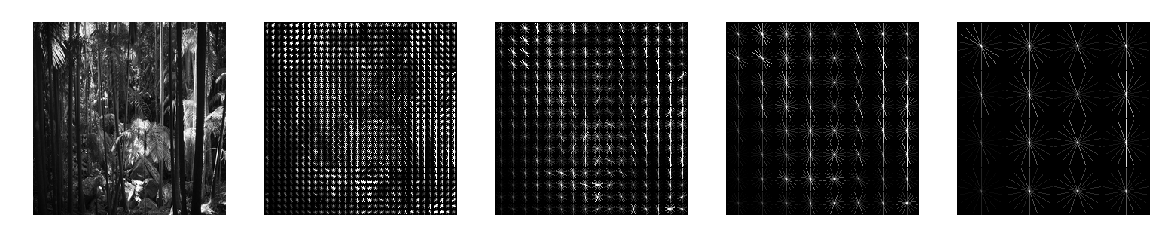

(324,)
8.99999881314


In [125]:
################################################################################################7
# Feature extraction
################################################################################################
# Create feature vectors X_train, X_test in ascending order of class labels

################################################################################################
# HOG features - visualize
################################################################################################

img = cv2.imread(train_images['rainforest'][87], 0)

n_cell = 32
fd, hog_image2 = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualise=True)
fd, hog_image3 = hog(img, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(2, 2), visualise=True)
fd, hog_image4 = hog(img, orientations=9, pixels_per_cell=(n_cell, n_cell),
                    cells_per_block=(2, 2), visualise=True)
fd, hog_image5 = hog(img, orientations=9, pixels_per_cell=(64, 64),
                    cells_per_block=(2, 2), visualise=True)

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)
ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')
ax5.axis('off')
ax1.imshow(img, cmap=plt.cm.gray)
# ax1.set_title('Input image')
# ax2.set_title('Histograms of Oriented Gradients')
# ax1.set_adjustable('box-forced')
# Rescale histogram for better display
# hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
# ax2.axis('off')
ax2.imshow(exposure.rescale_intensity(hog_image2, in_range=(0, 10)), cmap=plt.cm.gray)
ax3.imshow(exposure.rescale_intensity(hog_image3, in_range=(0, 10)), cmap=plt.cm.gray)
ax4.imshow(exposure.rescale_intensity(hog_image4, in_range=(0, 10)), cmap=plt.cm.gray)
ax5.imshow(exposure.rescale_intensity(hog_image5, in_range=(0, 10)), cmap=plt.cm.gray)
# plt.tight_layout(w_pad=1.)
# ax1.set_adjustable('box-forced')
plt.show()

print np.shape(fd)
print np.sum(fd)

In [2]:
################################################################################################
# HOG features - extract
################################################################################################
n_pix = 32
f_type = 'hog_' + str(n_pix) + '_gamma'
f_type = 'hog_' + str(n_pix)

def hog_features(img):
    return hog(img, orientations=9, pixels_per_cell=(n_pix, n_pix),
                    cells_per_block=(2, 2), feature_vector=True)#, transform_sqrt=True)

X_train[f_type] = []
X_test[f_type] = []

# Over all 4 classes
for c in classes:
    # Over training images
    for img_name in train_images[c]:
        img = cv2.imread(img_name, 0)
        descriptor = hog_features(img)
        X_train[f_type].append(descriptor)
        
    # Over testing images
    for img_name in test_images[c]:
        img = cv2.imread(img_name, 0)
        descriptor = hog_features(img)
        X_test[f_type].append(descriptor)

X_train[f_type] = np.array(X_train[f_type])
X_test[f_type] = np.array(X_test[f_type])

/usr/local/lib/python2.7/dist-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


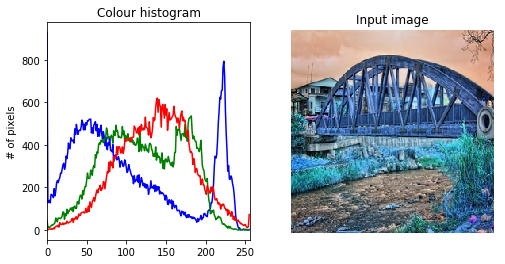

flattened feature vector has size:  (768,)


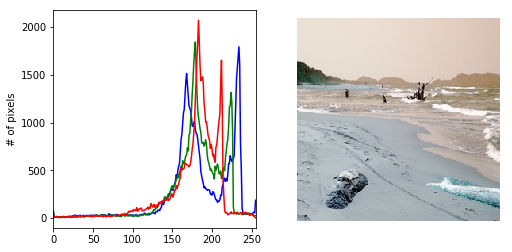

flattened feature vector has size:  (768,)


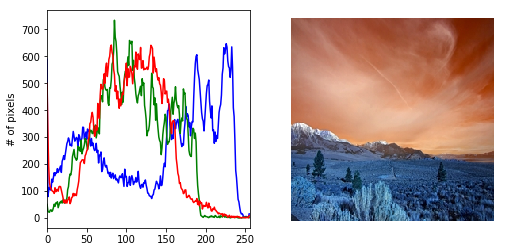

flattened feature vector has size:  (768,)


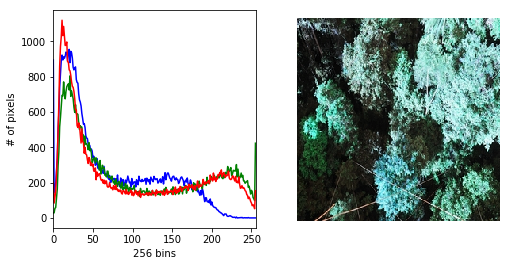

flattened feature vector has size:  (768,)


In [89]:
################################################################################################
# Colour features - visualize
################################################################################################

for i, cl in enumerate(classes):
    img = cv2.imread(train_images[cl][111])
    chans = cv2.split(img)
    colours = ("b", "g", "r")

    fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(8, 4))
    ax1.axis('off')
    ax1.imshow(img)
    if i == 0:
        ax1.set_title('Input image')
        #ax1.set_adjustable('box-forced')
        ax2.set_title('Colour histogram')
    #ax2.set_adjustable('box-forced')
    if i == 3:
        ax2.set_xlabel("256 bins")
    
    ax2.set_ylabel("# of pixels")
    features = []
    # Iterate over image channels
    for (chan, col) in zip(chans, colours):
        # create a histogram for the current channel and
        # concatenate the resulting histograms for each
        # channel
        # 256 bins for each channel => = 768 values
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        features.extend(hist)
        ax2.plot(hist, color=col, label=col)
        ax2.set_xlim([0, 256])
    plt.legend()
    plt.show()
    print "flattened feature vector has size: ", np.array(features).flatten().shape


In [ ]:
np.shape(cv2.calcHist(img, [0,1,2], None, [32, 32, 32], [0, 256,0, 256,0, 256]))
256/64

In [3]:
################################################################################################
# Colour features - extract
################################################################################################

def extract_colour_fd(img, n_pix, n_bins):
    n_cells = 256 / n_pix # cell size = n_pix x n_pix pixels
    fd = []
    for i in range(n_cells):
        for j in range(n_cells):
            for c in range(3): # For each colour channel: BGR
                #subimg = exposure.equalize_hist(img[i*n_pix:(i+1)*n_pix, j*n_pix:(j+1)*n_pix, c])
                #print subimg
                hist = cv2.calcHist(img[i*n_pix:(i+1)*n_pix, j*n_pix:(j+1)*n_pix, c], [c], None, [n_bins], [0, 256]).flatten()
                fd.extend(hist / np.sum(hist)) # Normalize the histogram
    return fd

def extract_colour_features(n_pix, n_bins):
    
    X_train_tmp = []
    X_test_tmp = []
    
    # Over all 4 classes
    for c in classes:
        # Over training images
        for img_name in train_images[c]:
            img = cv2.imread(img_name)
            descriptor = extract_colour_fd(img, n_pix, n_bins)
            X_train_tmp.append(descriptor)

        # Over testing images
        for img_name in test_images[c]:
            img = cv2.imread(img_name)
            descriptor = extract_colour_fd(img, n_pix, n_bins)
            X_test_tmp.append(descriptor)

    return np.array(X_train_tmp), np.array(X_test_tmp)

In [131]:
################################################################################################
# Train, cross-validate and test using linear SVM classifier
################################################################################################

def train_cv_test_linearSVM(X_train, X_test, verbose=False):
    # 5-fold cross-validation using grid search at logarithmic scale
    C_range = 2. ** np.arange(-11, 5, step=1.)
    parameters = [{'C': C_range}]
    grid = GridSearchCV(svm.LinearSVC(), parameters, cv=5, n_jobs=8)
    grid.fit(X_train, y_train)
    bestC = grid.best_params_['C']
    print "\tThe best parameter is: Cost=", np.log2(bestC)

    # Using the best hyperparameters, train on full training set
    SVM_linear_best = grid.best_estimator_
    SVM_linear_best.fit(X_train, y_train)

    # Evaluate
    y_pred = SVM_linear_best.predict(X_test)
    if verbose:
        print (metrics.classification_report(y_test, y_pred, target_names=classes))
    print "\tOverall Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 3)
    return confusion_matrix(y_test, y_pred)

In [65]:
#train_cv_test_linearSVM(X_train['hog_8'], X_test['hog_8'])
# train_cv_test_linearSVM(X_train['hog_16'], X_test['hog_16'])
train_cv_test_linearSVM(X_train['hog_32'], X_test['hog_32'])
cm = train_cv_test_linearSVM(X_train['hog_32_gamma'], X_test['hog_32_gamma'])
# train_cv_test_linearSVM(X_train['hog_64'], X_test['hog_64'])

# Without and with gamma correction
# 	The best parameter is: Cost= -1.0
# 	Overall Accuracy: 0.793
# 	The best parameter is: Cost= 0.0
# 	Overall Accuracy: 0.771

	The best parameter is: Cost= -1.0
	Overall Accuracy: 0.793
	The best parameter is: Cost= 0.0
	Overall Accuracy: 0.771


	The best parameter is: Cost= -5.0
             precision    recall  f1-score   support

     bridge       1.00      0.43      0.60        35
      coast       0.82      0.94      0.88        35
   mountain       0.76      0.80      0.78        35
 rainforest       0.65      0.89      0.75        35

avg / total       0.81      0.76      0.75       140

	Overall Accuracy: 0.764
[[15  5  3 12]
 [ 0 33  2  0]
 [ 0  2 28  5]
 [ 0  0  4 31]]


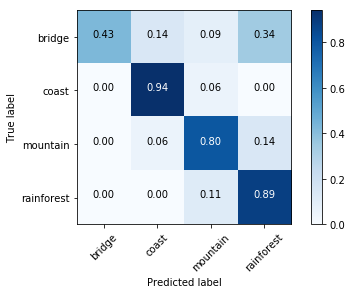

In [46]:
# Plot confusion matrix
cm = train_cv_test_linearSVM(X_train['hog_32'], X_test['hog_32'], True)
print cm
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
#plt.title('Normalized confusion matrix: HOG feature set hog_32')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

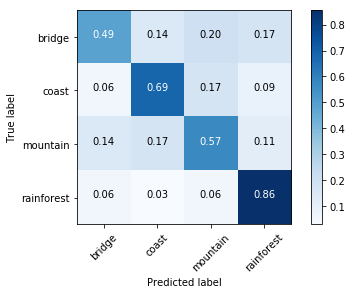

In [40]:
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
#plt.title('Normalized confusion matrix using colour features')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [4]:
################################################################################################
# Automatic feature extraction of colour features
# and classification for various feature extraction parameters
################################################################################################

# n_pix_range =  [8, 16, 32]
# n_bins_range = [16, 32, 64]
n_pix_range =  [16]
n_bins_range = [32]

for n_pix in n_pix_range:
    for n_bins in n_bins_range:
        f_type = 'col_'+ str(n_pix) +'_' + str(n_bins) #+ '_eq'
        print f_type
        X_train[f_type], X_test[f_type] = extract_colour_features(n_pix, n_bins)
        cm = train_cv_test_linearSVM(X_train[f_type], X_test[f_type])

col_16_32


NameError: name 'train_cv_test_linearSVM' is not defined

In [20]:
np.sum(X_train['col_16_32'][154])
np.sum(X_train['hog_32'][122])

0.99999999999999989

In [52]:
################################################################################################
# Multimodal features (hog_32 + col_16_32)
################################################################################################

best_hog_fd = 'hog_32'
best_col_fd = 'col_16_32'
normalize = True

# Normalize each modality separately (L1-norm)
if normalize:
    X_train[best_hog_fd + '_norm'] = normalize(X_train[best_hog_fd], axis=1, norm='l1')
    X_test[best_hog_fd+ '_norm'] = normalize(X_test[best_hog_fd], axis=1, norm='l1')
    X_train[best_col_fd+ '_norm'] = normalize(X_train[best_col_fd], axis=1, norm='l1')
    X_test[best_col_fd+ '_norm'] = normalize(X_test[best_col_fd], axis=1, norm='l1')
    best_hog_fd = best_hog_fd + '_norm'
    best_col_fd = best_col_fd+ '_norm'
X_train['multimodal'] = np.append(X_train[best_hog_fd], X_train[best_col_fd], axis=1)
X_test['multimodal'] = np.append(X_test[best_hog_fd], X_test[best_col_fd], axis=1)
print "Multimodal features, combining ", best_hog_fd, " and ", best_col_fd
cm = train_cv_test_linearSVM(X_train['multimodal'], X_test['multimodal'], True)

Multimodal features, combining  hog_32_norm  and  col_16_32_norm
	The best parameter is: Cost= -9.0
             precision    recall  f1-score   support

     bridge       1.00      0.37      0.54        35
      coast       0.70      1.00      0.82        35
   mountain       0.85      0.66      0.74        35
 rainforest       0.64      0.91      0.75        35

avg / total       0.80      0.74      0.72       140

	Overall Accuracy: 0.736


In [59]:
# Tuning the weighting parameter p
p_range = np.linspace(0.4975, 0.506, 10)

best_hog_fd = 'hog_32_norm'
best_col_fd = 'col_16_32_norm'

for p in p_range:
    X_train['multimodal'] = np.append(p * X_train[best_hog_fd], (1.-p) * X_train[best_col_fd], axis=1)
    X_test['multimodal'] = np.append(p * X_test[best_hog_fd], (1.-p) * X_test[best_col_fd], axis=1)
    print "Multimodal features, combining ", best_hog_fd, " and ", best_col_fd
    print "\tp = ", p
    cm = train_cv_test_linearSVM(X_train['multimodal'], X_test['multimodal'])

Multimodal features, combining  hog_32_norm  and  col_16_32_norm
	p =  0.4975
	The best parameter is: Cost= -8.0
	Overall Accuracy: 0.707
Multimodal features, combining  hog_32_norm  and  col_16_32_norm
	p =  0.498444444444
	The best parameter is: Cost= -8.0
	Overall Accuracy: 0.714
Multimodal features, combining  hog_32_norm  and  col_16_32_norm
	p =  0.499388888889
	The best parameter is: Cost= -10.0
	Overall Accuracy: 0.693
Multimodal features, combining  hog_32_norm  and  col_16_32_norm
	p =  0.500333333333
	The best parameter is: Cost= -8.0
	Overall Accuracy: 0.736
Multimodal features, combining  hog_32_norm  and  col_16_32_norm
	p =  0.501277777778
	The best parameter is: Cost= -9.0
	Overall Accuracy: 0.714
Multimodal features, combining  hog_32_norm  and  col_16_32_norm
	p =  0.502222222222
	The best parameter is: Cost= -10.0
	Overall Accuracy: 0.629
Multimodal features, combining  hog_32_norm  and  col_16_32_norm
	p =  0.503166666667
	The best parameter is: Cost= -9.0
	Overall 

In [70]:
################################################################################################
# Train, cross-validate and test using RBF kernel SVM classifier
################################################################################################

def train_cv_test_RBFSVM(X_train, X_test, verbose=False):
    # 5-fold cross-validation using grid search at logarithmic scale
#     C_range = 2. ** np.arange(3, 4, step=0.15)
#     g_range = 2. ** np.arange(-4, -3, step=0.15)
    C_range = 2. ** np.arange(0, 2, step=1.)
    g_range = 2. ** np.arange(-11, -7, step=1.)
    parameters = [{'gamma': g_range, 'C': C_range, 'kernel': ['rbf']}]
    grid = GridSearchCV(svm.SVC(), parameters, cv=5, n_jobs=8)
    grid.fit(X_train, y_train)
    bestC = grid.best_params_['C']
    bestG = grid.best_params_['gamma']
    print "\tThe best parameters are: gamma=", np.log2(bestG), "Cost=", np.log2(bestC)

    # Using the best hyperparameters, train on full training set
    SVM_rbf = grid.best_estimator_
    SVM_rbf.fit(X_train, y_train)

    # Evaluate
    y_pred = SVM_rbf.predict(X_test)
    if verbose:
        print (metrics.classification_report(y_test, y_pred, target_names=classes))
        
    print "\tOverall Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 3)

    return confusion_matrix(y_test, y_pred)

cm = train_cv_test_RBFSVM(X_train['hog_32'], X_test['hog_32'])
cm = train_cv_test_RBFSVM(X_train['col_16_32'], X_test['col_16_32'])

	The best parameters are: gamma= -9.0 Cost= 1.0
	Overall Accuracy: 0.643


In [5]:
# Decision level fusion: RBF kernel SVM for HOG features + linear SVM for colour features

SVM_rbf = svm.SVC(kernel='rbf', gamma=2**(-3.1), C=2**(3.15), probability=True)
SVM_rbf.fit(X_train['hog_32'], y_train)
y_pred = SVM_rbf.predict(X_test['hog_32'])
print (metrics.classification_report(y_test, y_pred, target_names=classes))
print "\tOverall Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 3)
print confusion_matrix(y_test, y_pred)

SVM_lin = svm.SVC(kernel='linear', C=2**(-6), probability=True)
SVM_lin.fit(X_train['col_16_32'], y_train)
y_pred = SVM_lin.predict(X_test['col_16_32'])
print (metrics.classification_report(y_test, y_pred, target_names=classes))
print "\tOverall Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 3)
print confusion_matrix(y_test, y_pred)

print "---------------------------------------------------------------------------"
print "Decision level fusion:"

# train and cross-val another classifier that takes 
# input [SVM_rbf.predict_proba & SVM_lin.predict_proba] 
# and gives class 1,2,3,4

             precision    recall  f1-score   support

     bridge       0.92      0.69      0.79        35
      coast       0.86      0.89      0.87        35
   mountain       0.72      0.83      0.77        35
 rainforest       0.79      0.86      0.82        35

avg / total       0.82      0.81      0.81       140

	Overall Accuracy: 0.814
[[24  3  4  4]
 [ 2 31  2  0]
 [ 0  2 29  4]
 [ 0  0  5 30]]
             precision    recall  f1-score   support

     bridge       0.59      0.63      0.61        35
      coast       0.83      0.69      0.75        35
   mountain       0.60      0.60      0.60        35
 rainforest       0.77      0.86      0.81        35

avg / total       0.70      0.69      0.69       140

	Overall Accuracy: 0.693
[[22  2  6  5]
 [ 5 24  6  0]
 [ 7  3 21  4]
 [ 3  0  2 30]]
---------------------------------------------------------------------------
Decision level fusion:


In [6]:
newXtrain = np.append(SVM_rbf.predict_proba(X_train['hog_32']), SVM_lin.predict_proba(X_train['col_16_32']), axis=1)
#print newX
newXtest = np.append(SVM_rbf.predict_proba(X_test['hog_32']), SVM_lin.predict_proba(X_test['col_16_32']), axis=1)


In [10]:
from sklearn import linear_model
C_range = 2. ** np.arange(-45, 15, step=1.)
parameters = [{'C': C_range}]
grid = GridSearchCV(linear_model.LogisticRegression(), parameters, cv=5, n_jobs=8)
grid.fit(newXtrain, y_train)
bestC = grid.best_params_['C']
print "\tThe best parameters are: Cost=", np.log2(bestC)

logreg = grid.best_estimator_
logreg.fit(newXtrain, y_train)

y_pred = logreg.predict(newXtest)
print (metrics.classification_report(y_test, y_pred, target_names=classes))
print "\tOverall Accuracy:", round(metrics.accuracy_score(y_test, y_pred), 3)
print confusion_matrix(y_test, y_pred)

	The best parameters are: Cost= -45.0
             precision    recall  f1-score   support

     bridge       0.90      0.74      0.81        35
      coast       0.87      0.97      0.92        35
   mountain       0.86      0.89      0.87        35
 rainforest       0.86      0.89      0.87        35

avg / total       0.87      0.87      0.87       140

	Overall Accuracy: 0.871
[[26  3  2  4]
 [ 1 34  0  0]
 [ 1  2 31  1]
 [ 1  0  3 31]]


In [ ]:
################################################################################################
# Cross-dataset testing using RBF kernel SVM classifier trained on 'hog_32' feature set
################################################################################################

# Load external testing set
X_test2
y_test2

# Check duplicates

# Extract 'hog_32' features


parameters = [{'gamma': g_range, 'C': C_range, 'kernel': ['rbf']}]
bestC = 2 ** (3.15)
bestG = 2 ** (-3.1)

# Train using the best hyperparameters
SVM_rbf = svm.SVC(C=bestC, kernel='rbf', gamma=bestG)
SVM_rbf.fit(X_train, y_train)
# Evaluate
y_pred = SVM_rbf.predict(X_test2)
print "Overall accuracy on external dataset:", round(metrics.accuracy_score(y_test2, y_pred), 3)
print (metrics.classification_report(y_test2, y_pred, target_names=classes))
return confusion_matrix(y_test2, y_pred)

In [ ]:

# 3D            fd.extend(cv2.calcHist(img[i*cell_size:(i+1)*cell_size, j*cell_size:(j+1)*cell_size, :], 
#                                    [0,1,2], None, [bins, bins, bins], [0, 256, 0, 256, 0, 256]).flatten())

In [ ]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt


img = data.camera()
img = cv2.imread(train_images['bridge'][0], 0)
descs, descs_img = daisy(img, step=40, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
ax.set_title('%i DAISY descriptors extracted:' % descs_num)
plt.show()
print np.shape(descs)
print len(descs.flatten())

In [ ]:
def daisy_features(img):
    return daisy(img, step=40, radius=58, rings=2, histograms=6,
                         orientations=8).flatten()
f_type = 'daisy'

X_train[f_type] = []
X_test[f_type] = []

# Over all 4 classes
for c in classes:
    # Over training images
    for img_name in train_images[c]:
        img = cv2.imread(img_name, 0)
        descriptor = daisy_features(img)
        X_train[f_type].append(descriptor)
        
    # Over testing images
    for img_name in test_images[c]:
        img = cv2.imread(img_name, 0)
        descriptor = daisy_features(img)
        X_test[f_type].append(descriptor)

X_train[f_type] = np.array(X_train[f_type])
X_test[f_type] = np.array(X_test[f_type])